In [1]:
import h5py
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation

import scipy.stats

import torch

from cca import ComplexityComponentsAnalysis
from cca.cov_util import (calc_pi_from_cross_cov_mats, calc_cov_from_cross_cov_mats,
                          project_cross_cov_mats)
from skimage.transform import resize

In [2]:
with h5py.File('/storage/cnmd/water/waves3.h5') as f:
    imgs = f['imgs'][()].astype(float)
mean = imgs.mean(axis=0)
imgs -= mean

In [3]:
imgs = resize(imgs, (imgs.shape[0]//3, 16, 16), anti_aliasing=True)
X = imgs.reshape(imgs.shape[0], -1).astype(float)

/home/jesse/anaconda3/envs/cca/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [4]:
U, D, V = np.linalg.svd(X)

In [5]:
Xrpca = U[:, :12].dot(np.diag(D[:12])).dot(V[:12])

3


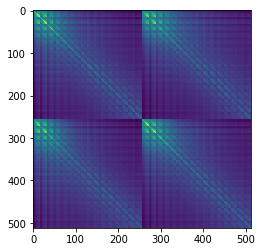

In [9]:
model = ComplexityComponentsAnalysis(T=1, verbose=False, init='random_ortho', device='cpu', dtype=torch.float)
model.estimate_cross_covariance(X, regularization='kron', reg_ops={'skip': 1, 'num_folds': 5})

In [ ]:
dims = np.arange(1, 256, 20)
pis = []
pca_pis = []
for d in dims:
    print(d)
    model.fit_projection(d=d)
    pis.append(model.score())
    pca_pis.append(calc_pi_from_cross_cov_mats(model.cross_covs, proj=V[:d].T))

1
21
41
61
81
101
121
141
161
181
201


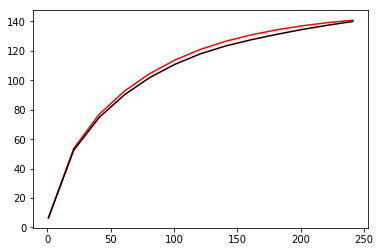

In [8]:
plt.plot(dims, pis, c='r')
plt.plot(dims, pca_pis, c='k')

In [73]:
Xt = model.transform(X)

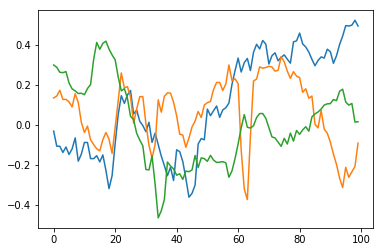

In [76]:
for v in Xt[:100].T[:3]:
    plt.plot(v)

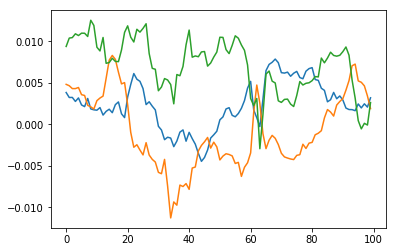

In [77]:
for v in U[:100].T[:3]:
    plt.plot(v)

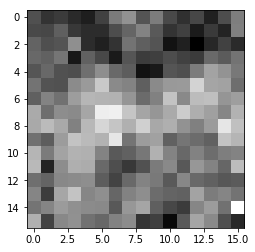

In [13]:
for im in model.coef_.T:
    plt.figure()
    plt.imshow(im.reshape(16, 16), cmap='gray')

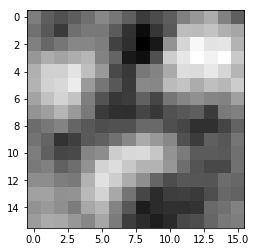

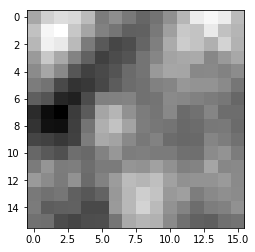

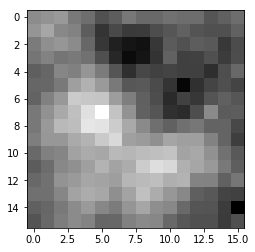

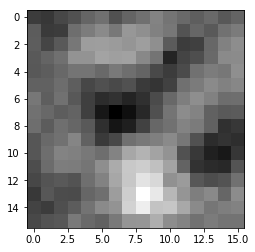

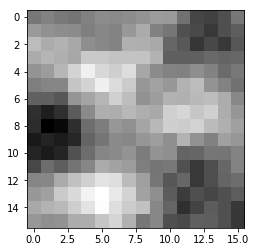

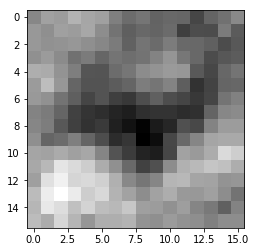

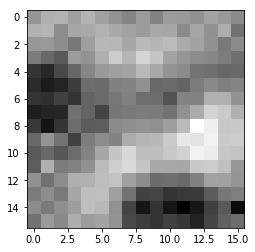

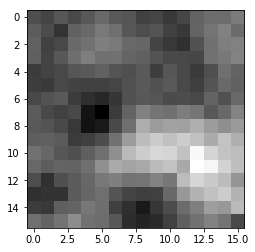

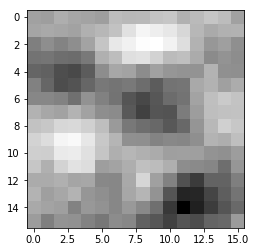

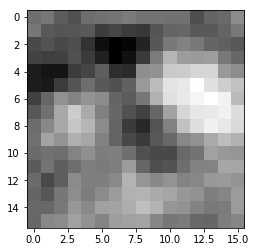

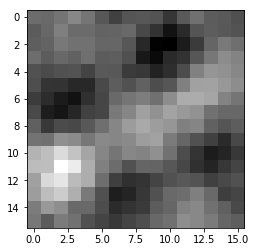

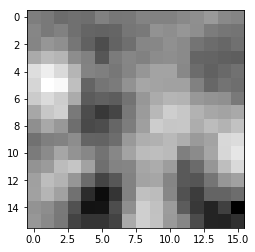

In [17]:
for im in model.coef_.T:
    plt.figure()
    plt.imshow(im.reshape(16, 16), cmap='gray')

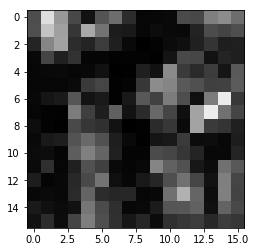

In [35]:
fig = plt.figure()


def f(ii):
    return imgs[ii]

ii = 0
im = plt.imshow(f(ii), animated=True, cmap='gray')


def updatefig(*args):
    global ii
    ii += 1
    im.set_array(f(ii))
    return im,

ani = animation.FuncAnimation(fig, updatefig, interval=50, frames=1000)
ani.save("movie.mp4")

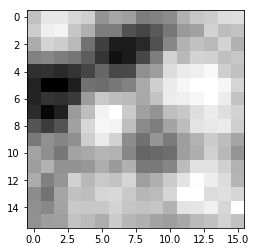

In [36]:
P = model.coef_
Xr = X.dot(P.dot(P.T))
imgsr = Xr.reshape(-1, 16, 16)

fig = plt.figure()


def f(ii):
    return imgsr[ii]

ii = 0
im = plt.imshow(f(ii), animated=True, cmap='gray')


def updatefig(*args):
    global ii
    ii += 1
    im.set_array(f(ii))
    return im,

ani = animation.FuncAnimation(fig, updatefig, interval=50, frames=1000)
ani.save("movier.mp4")

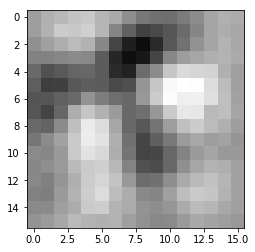

In [37]:
imgsp = Xrpca.reshape(-1, 16, 16)

fig = plt.figure()


def f(ii):
    return imgsp[ii]

ii = 0
im = plt.imshow(f(ii), animated=True, cmap='gray')


def updatefig(*args):
    global ii
    ii += 1
    im.set_array(f(ii))
    return im,

ani = animation.FuncAnimation(fig, updatefig, interval=50, frames=1000)
ani.save("moviep.mp4")